<a href="https://colab.research.google.com/github/FatihUlumuddin/Deteksi_Object_roboflow/blob/main/Deteksi_object.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install roboflow

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.5/81.5 kB 5.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 6.0 MB/s eta 0:00:00
  Attempting uninstall: idna
    Found existing installation: idna 3.10
    Uninstalling idna-3.10:
      Successfully uninstalled idna-3.10


In [ ]:
!nvidia-smi

Sat Jan 18 11:20:52 2025       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   51C    P8              11W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [ ]:
# clone YOLOv5 repository
%cd /content
!git clone https://github.com/ultralytics/yolov5

/content
Cloning into 'yolov5'...
remote: Enumerating objects: 17265, done.
remote: Counting objects: 100% (105/105), done.
remote: Compressing objects: 100% (91/91), done.
remote: Total 17265 (delta 57), reused 14 (delta 14), pack-reused 17160 (from 4)
Receiving objects: 100% (17265/17265), 16.01 MiB | 16.80 MiB/s, done.
Resolving deltas: 100% (11799/11799), done.


In [ ]:
# install dependencies as necessary
!pip install -r requirements.txt
!pip uninstall wandb -qy  # deprecated dependency
import torch

from IPython.display import Image, clear_output  # to display images

# clear_output()
print('Setup complete. Using torch %s %s' % (torch.__version__, torch.cuda.get_device_properties(0) if torch.cuda.is_available() else 'CPU'))

ERROR: Could not open requirements file: [Errno 2] No such file or directory: 'requirements.txt'
Setup complete. Using torch 2.5.1+cu121 _CudaDeviceProperties(name='Tesla T4', major=7, minor=5, total_memory=15102MB, multi_processor_count=40, uuid=8baf2f5e-007a-518a-a6d3-05a305e3d880, L2_cache_size=4MB)


In [ ]:
%cd /content/yolov5
!pip install -q roboflow==1.1.48

import roboflow
roboflow.login()

rf = roboflow.Roboflow(api_key="PBHa7CUhzUVZrT426hh7")
project = rf.workspace("plant-detection-uev1e").project("shark_detection-qhkrk")
version = project.version(1)
dataset = version.download("yolov5")

/content/yolov5
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 80.3/80.3 kB 3.2 MB/s eta 0:00:00
visit https://app.roboflow.com/auth-cli to get your authentication token.
Paste the authentication token here: ··········
loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to shark_detection-1 in yolov5pytorch:: 100%|██████████| 226/226 [00:00<00:00, 6637.77it/s]


In [ ]:
# train yolov5s on custom data for 25 epochs
# time its performance
%%time
%cd /content/yolov5/
!python train.py \
  --img 416 \
  --batch 16 \
  --epochs 25 \
  --data shark_detection-1/data.yaml \
  --weights yolov5s.pt \
  --name yolov5s_results  \
  --cache

/content/yolov5
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 910.2/910.2 kB 21.1 MB/s eta 0:00:00
Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.
2025-01-18 11:22:19.520078: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2025-01-18 11:22:19.539949: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2025-01-18 11:22:19.545841: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin c

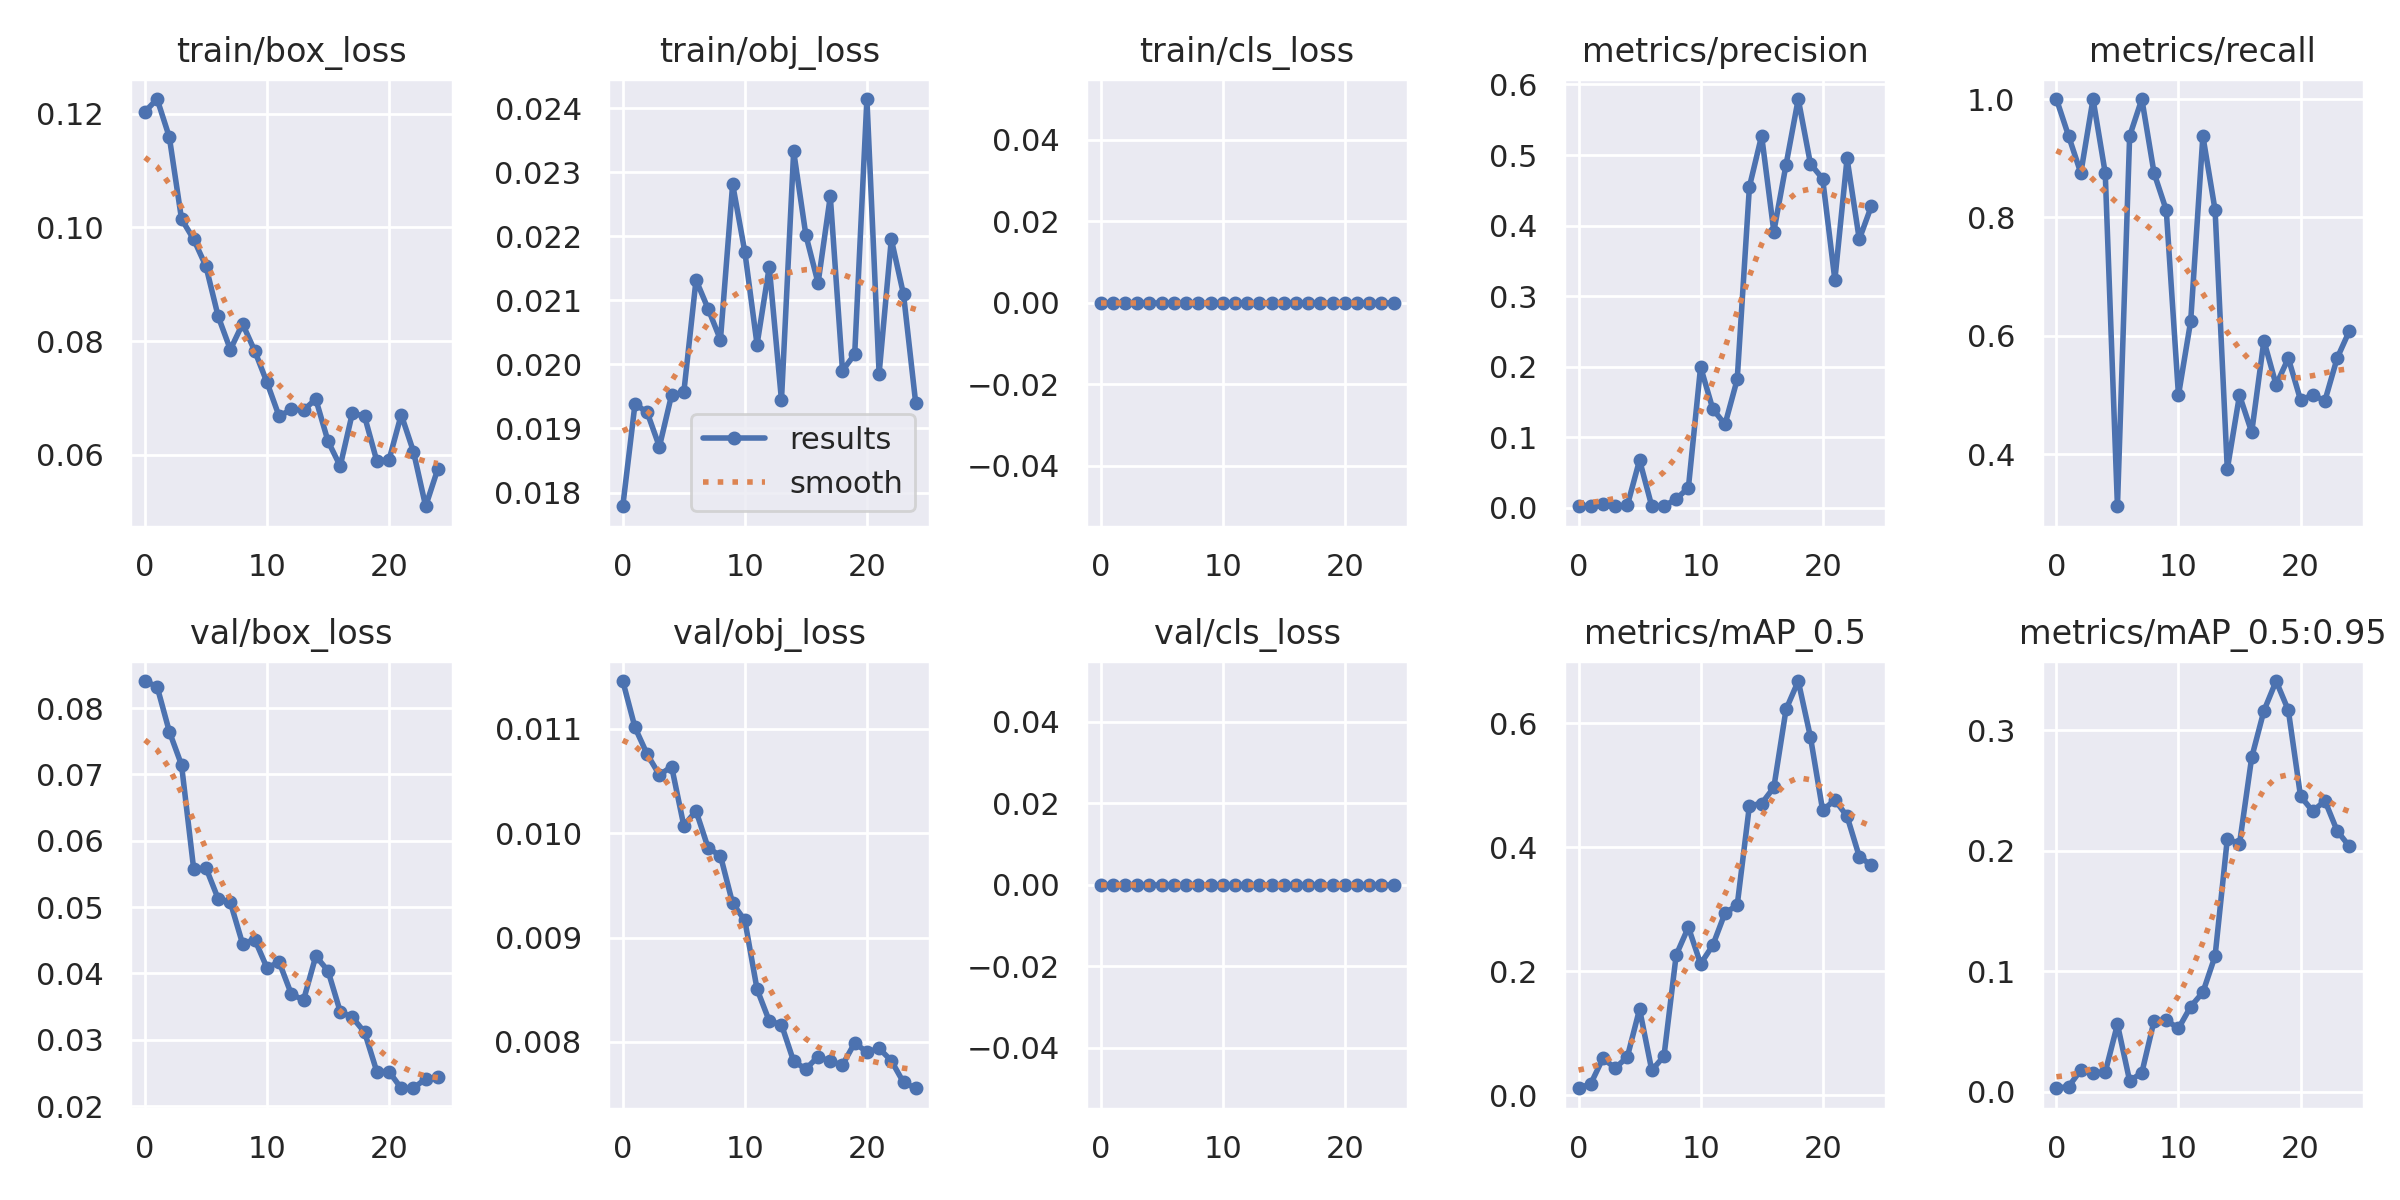

In [ ]:
from utils.plots import plot_results  # plot results.txt as results.png
Image(filename='/content/yolov5/runs/train/yolov5s_results/results.png', width=1000)

In [ ]:
%ls runs/train/yolov5s_results/weights

best.pt  last.pt


In [ ]:
%cd /content/yolov5/
!python detect.py --weights runs/train/yolov5s_results/weights/best.pt --img 416 --conf 0.35 --source shark_detection-1/train/images/

/content/yolov5
detect: weights=['runs/train/yolov5s_results/weights/best.pt'], source=shark_detection-1/train/images/, data=data/coco128.yaml, imgsz=[416, 416], conf_thres=0.35, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_format=0, save_csv=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v7.0-397-gde62f93c Python-3.11.11 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)

Fusing layers... 
Model summary: 157 layers, 7012822 parameters, 0 gradients, 15.8 GFLOPs
image 1/75 /content/yolov5/shark_detection-1/train/images/shark_103_images_jpg.rf.b65b126e18a2fb4550da2c84761e4c4f.jpg: 416x416 (no detections), 7.3ms
image 2/75 /content/yolov5/shark_detection-1/train/images/shark_104_images_jpg.rf.cb904e7d70f3a6c619c43155d874f362.jpg: 416

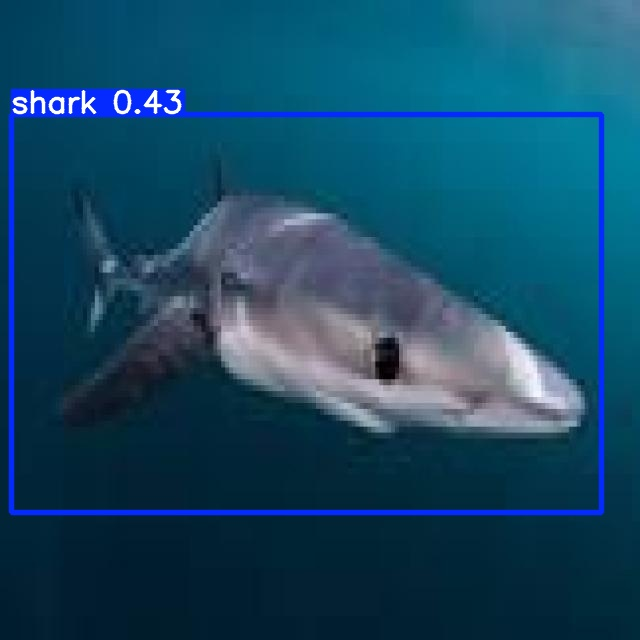

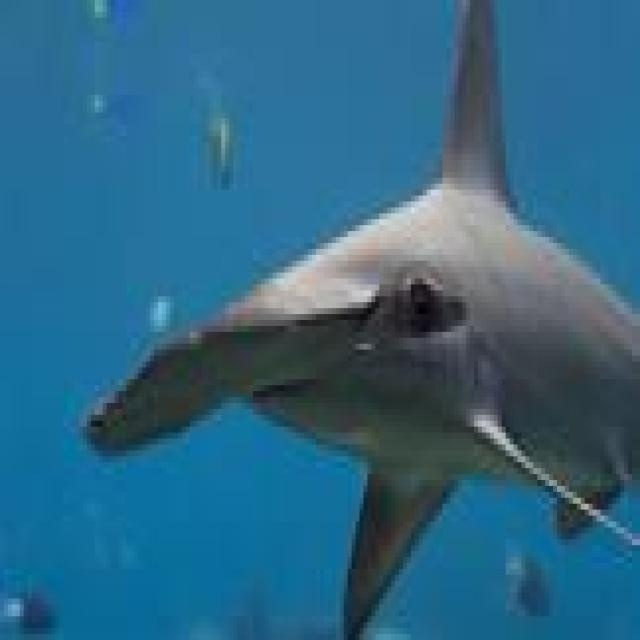

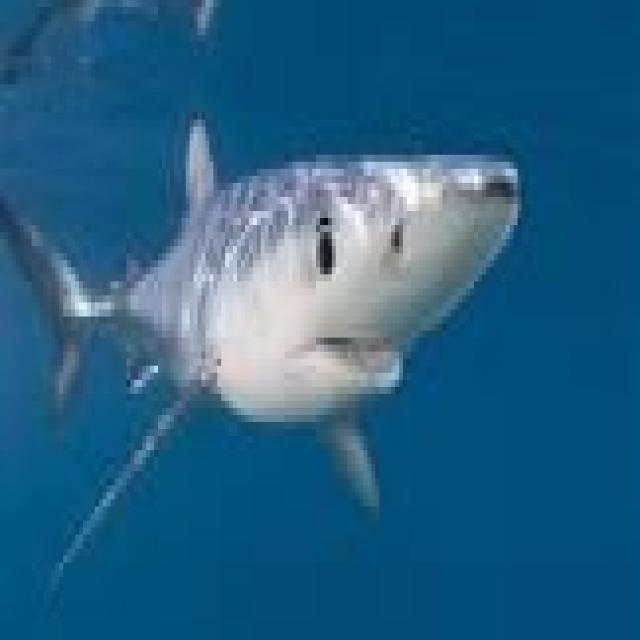

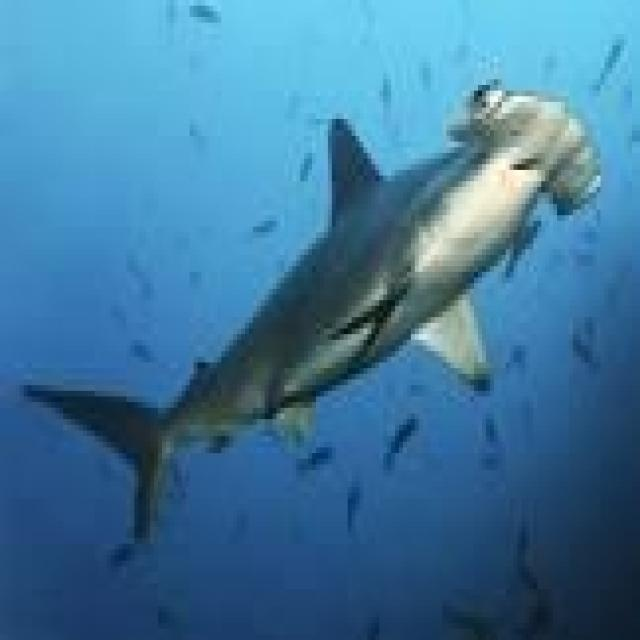

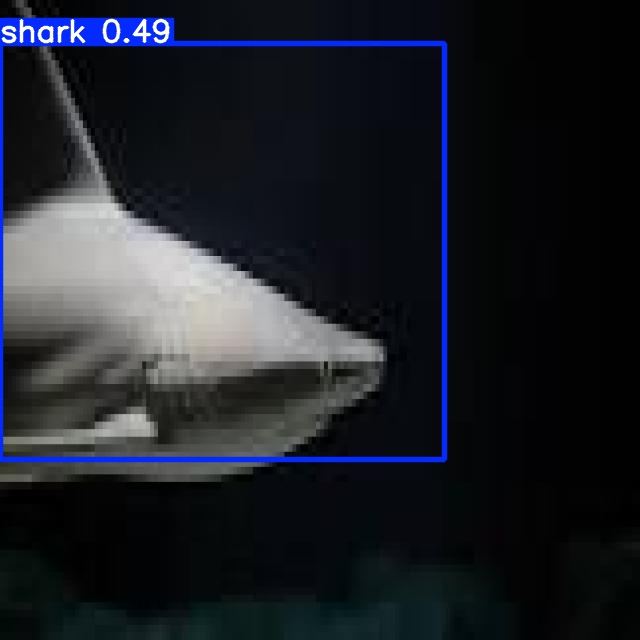

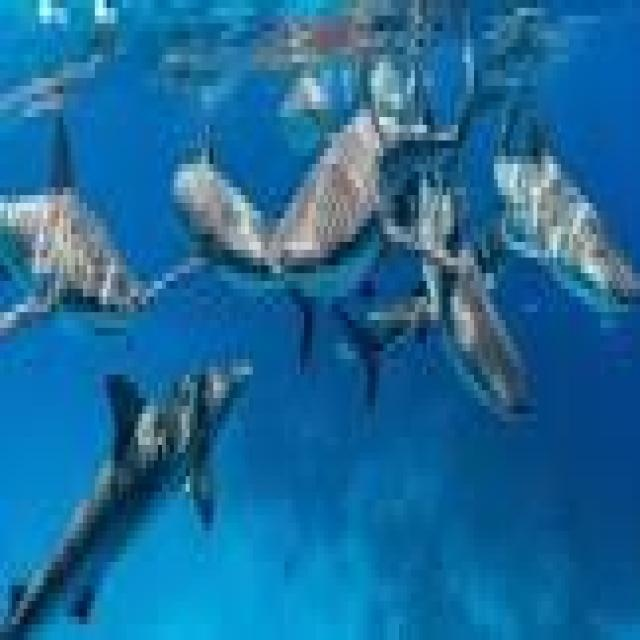

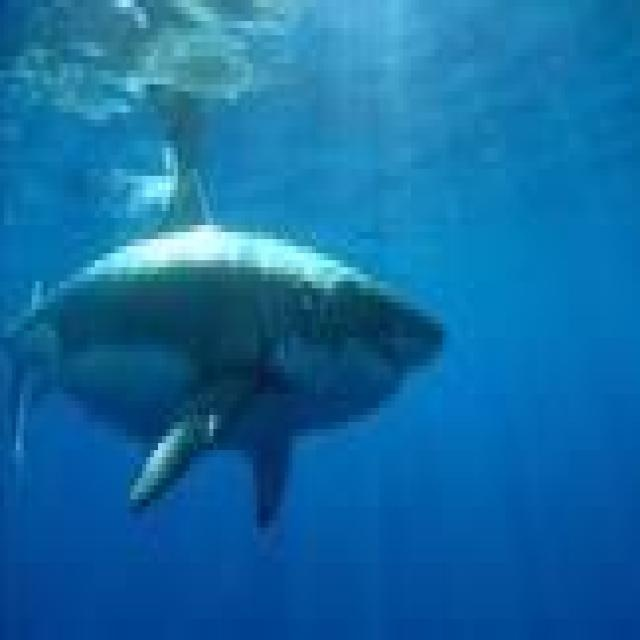

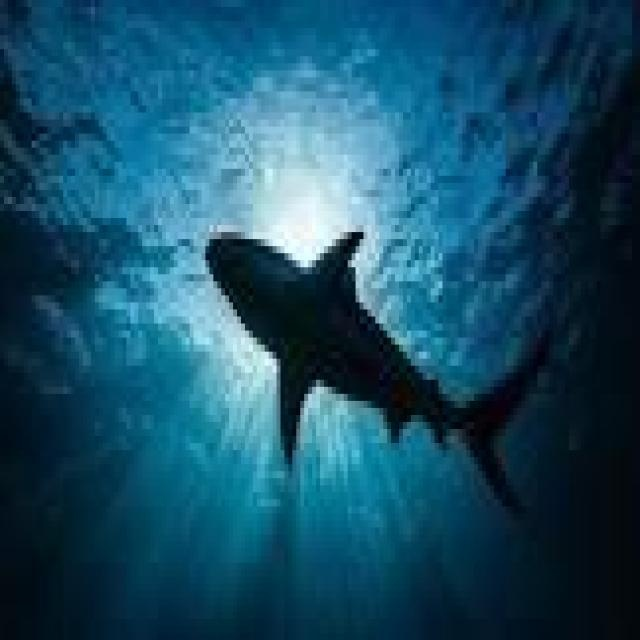

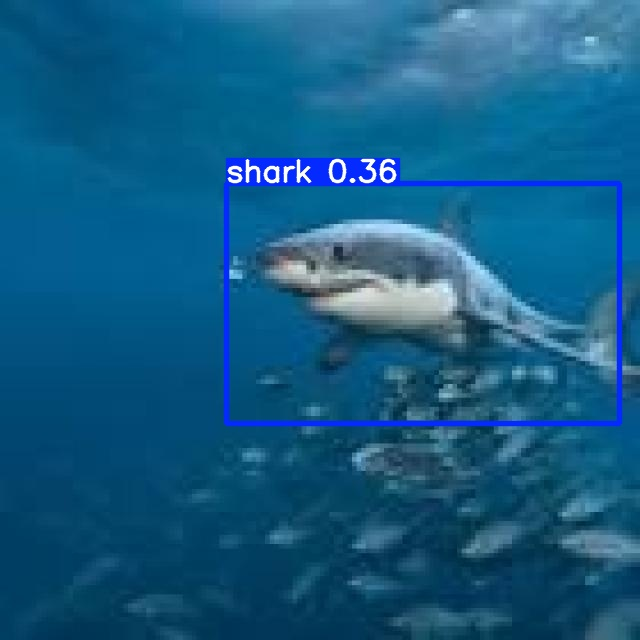

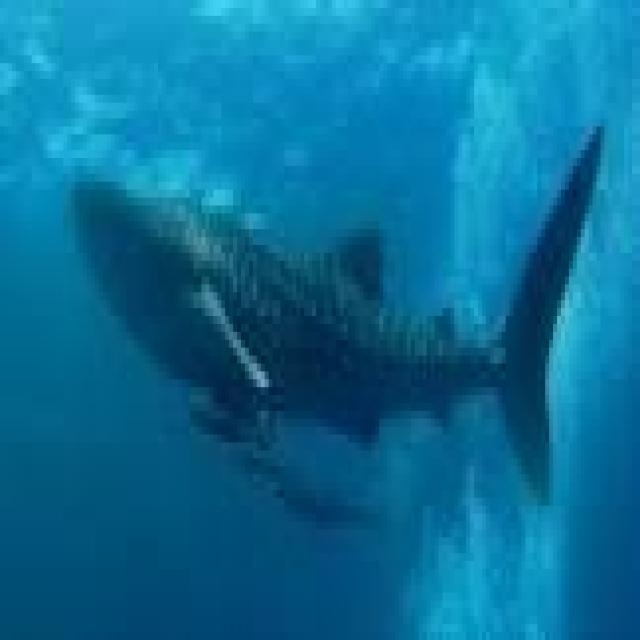

In [ ]:
import glob
from IPython.display import Image, display

for imageName in glob.glob('/content/yolov5/runs/detect/exp2/*.jpg')[:10]: #assuming JPG
    display(Image(filename=imageName))

In [ ]:
#Run inference on your model on a persistant, auto-scaling, cloud API

#load model
model = project.version(dataset.version).model

#choose random test set image
import os, random
test_set_loc = dataset.location + "/test/images/"
random_test_image = random.choice(os.listdir(test_set_loc))
print("running inference on " + random_test_image)

pred = model.predict(test_set_loc + random_test_image, confidence=40, overlap=30).json()
pred

running inference on shark_175_images_jpg.rf.d864304f5d832308e880a1b665032688.jpg


{'predictions': [{'x': 373.5,
   'y': 271.0,
   'width': 497.0,
   'height': 268.0,
   'confidence': 0.7630287408828735,
   'class': 'shark',
   'class_id': 0,
   'detection_id': 'c9bfe664-d7c3-4bc7-be09-f9548acae253',
   'image_path': '/content/yolov5/shark_detection-1/test/images/shark_175_images_jpg.rf.d864304f5d832308e880a1b665032688.jpg',
   'prediction_type': 'ObjectDetectionModel'}],
 'image': {'width': '640', 'height': '640'}}